In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv(r'F:\\Diwali Sales Data.csv',encoding='unicode_escape')

In [6]:
df.shape

(11251, 15)

In [7]:
if df is not None:
    print(df.columns)
else:
    print("DataFrame is None.")

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')


In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.drop(['Status','unnamed1'], axis=1,inplace=True)

In [10]:
pd.isnull(df).sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df['Amount']=df['Amount'].astype('int')

In [13]:
df['Amount'].dtype

dtype('int64')

In [14]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


# Exploratory Data Analysis

### Gender

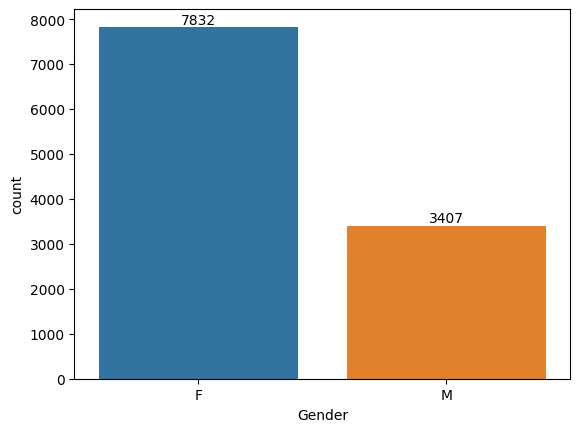

In [15]:
ax=sns.countplot(x='Gender',data=df,hue='Gender')
for bars in ax.containers:
        ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

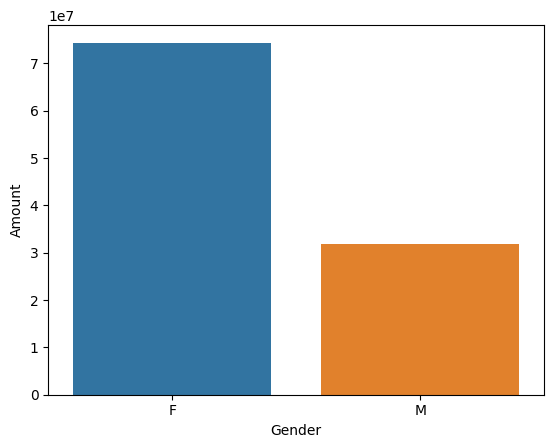

In [16]:
sales_gen=df.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(x='Gender',y='Amount',data=sales_gen,hue='Gender')


*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

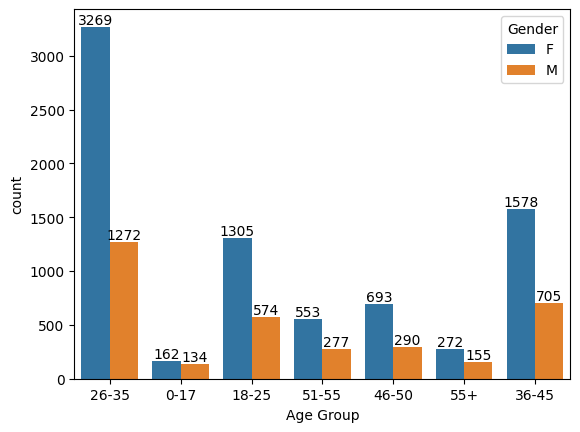

In [17]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
   ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

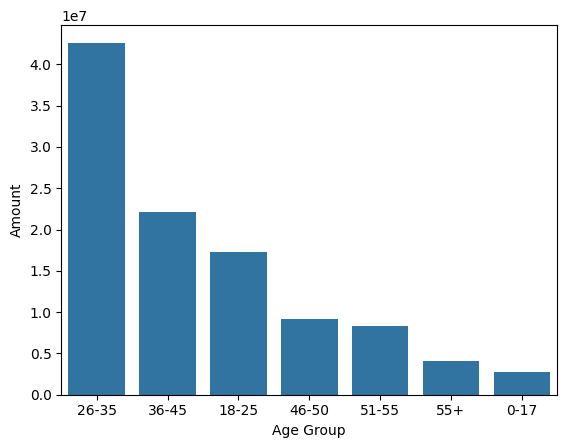

In [18]:
sales_age=df.groupby('Age Group')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

In [ ]:
### State

<Axes: xlabel='State', ylabel='Amount'>

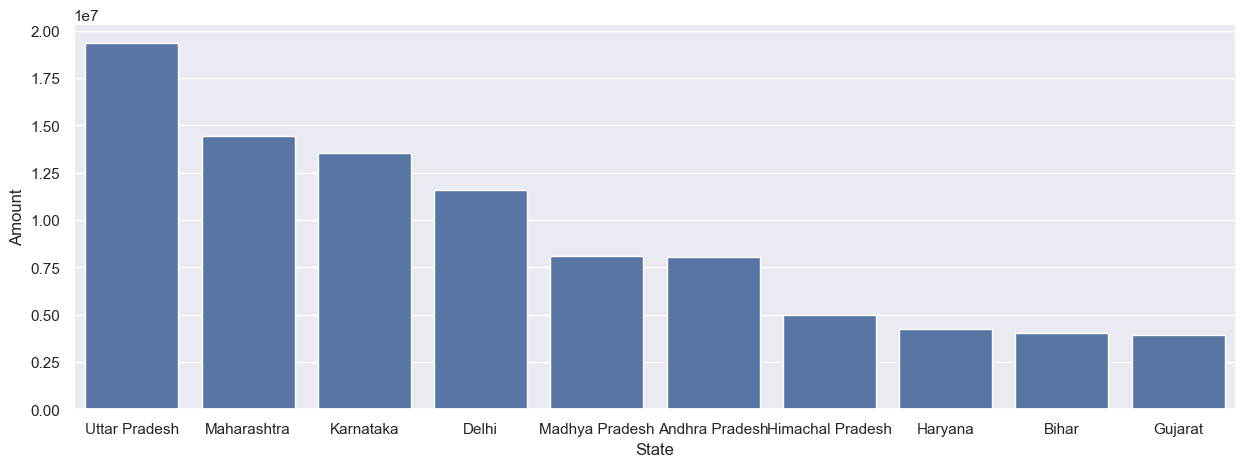

In [19]:
sales_state=df.groupby('State')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

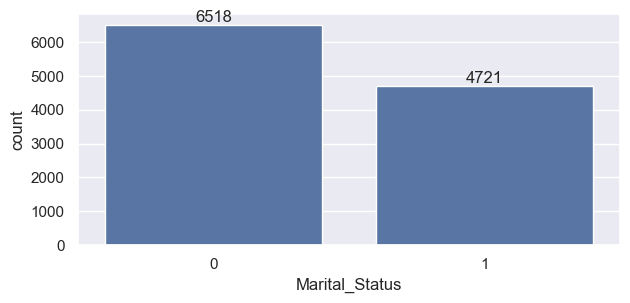

In [66]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(5,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

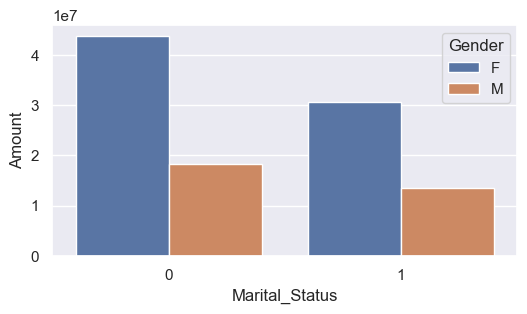

In [21]:
sales_state=df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index().sort_values(by=['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(6,3)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')


*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

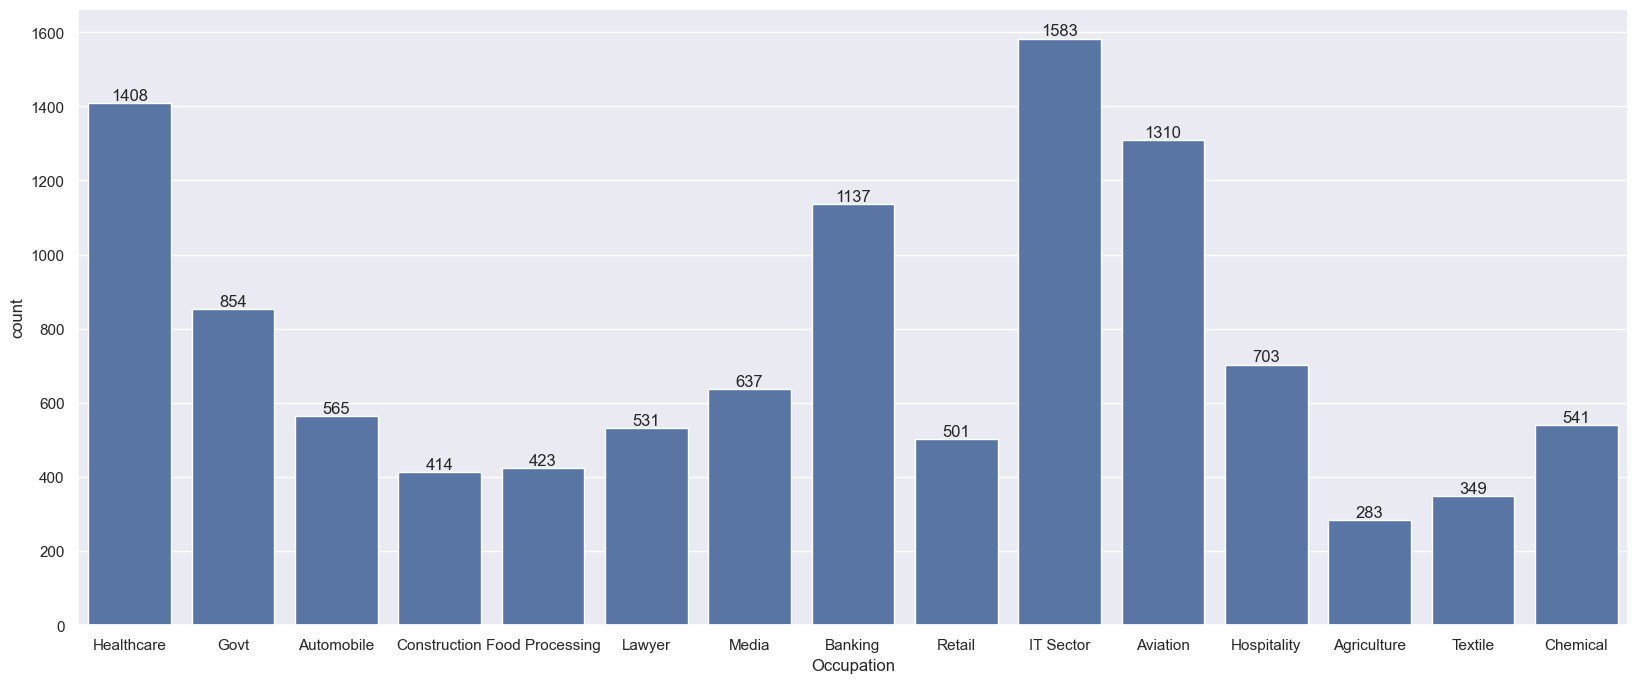

In [23]:
ax=sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

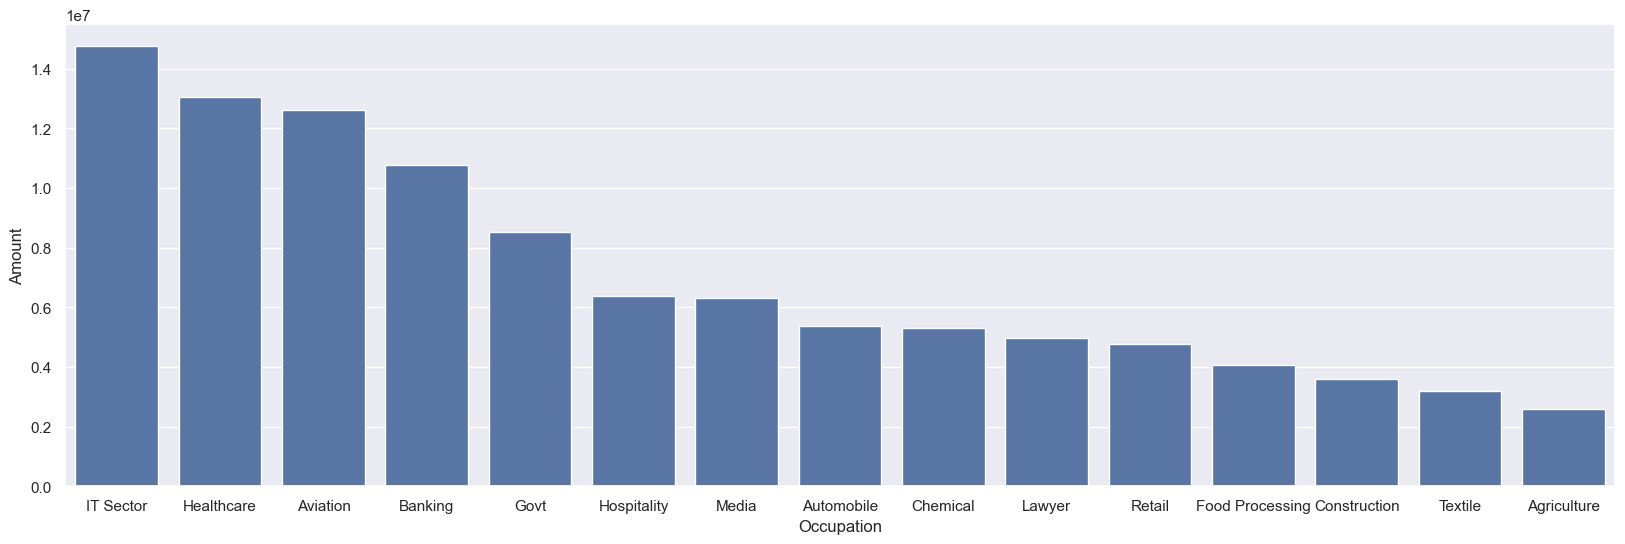

In [51]:
sales_state=df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

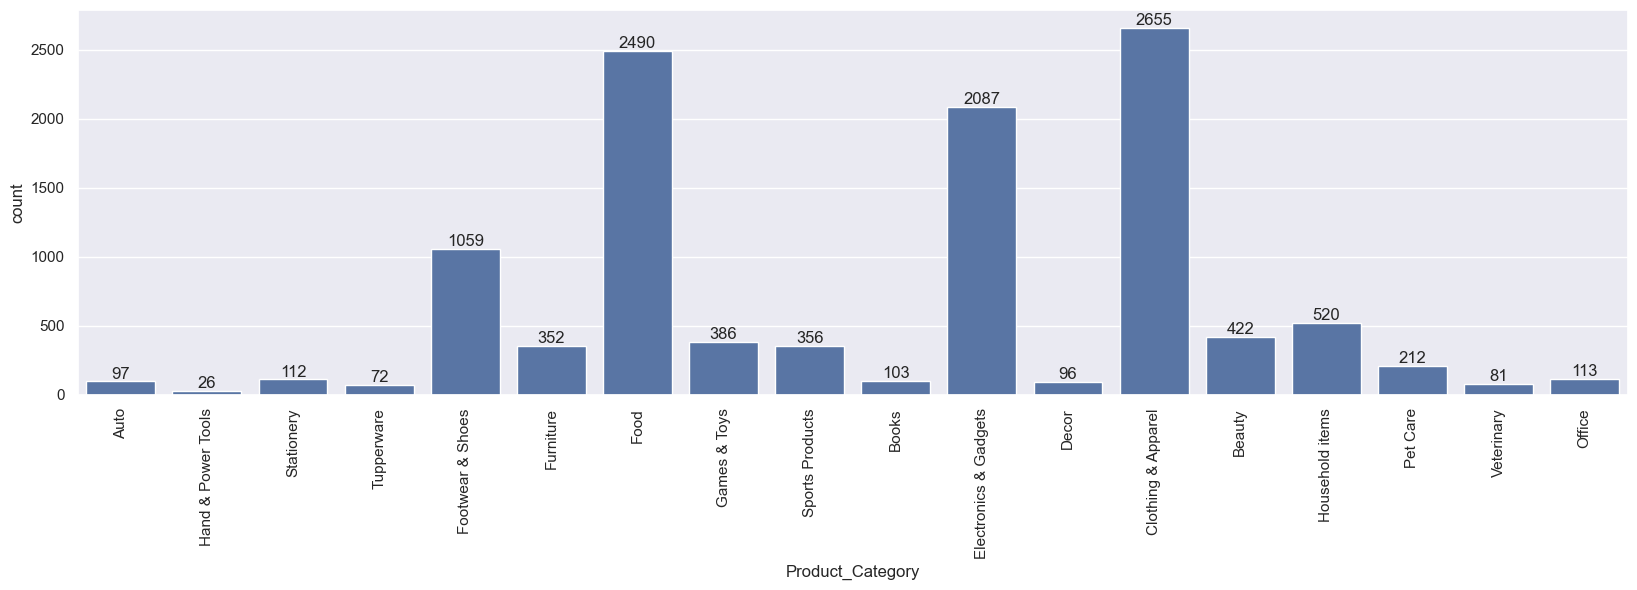

In [57]:
ax=sns.countplot(data=df,x='Product_Category')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=90)

<Axes: xlabel='Product_Category', ylabel='Amount'>

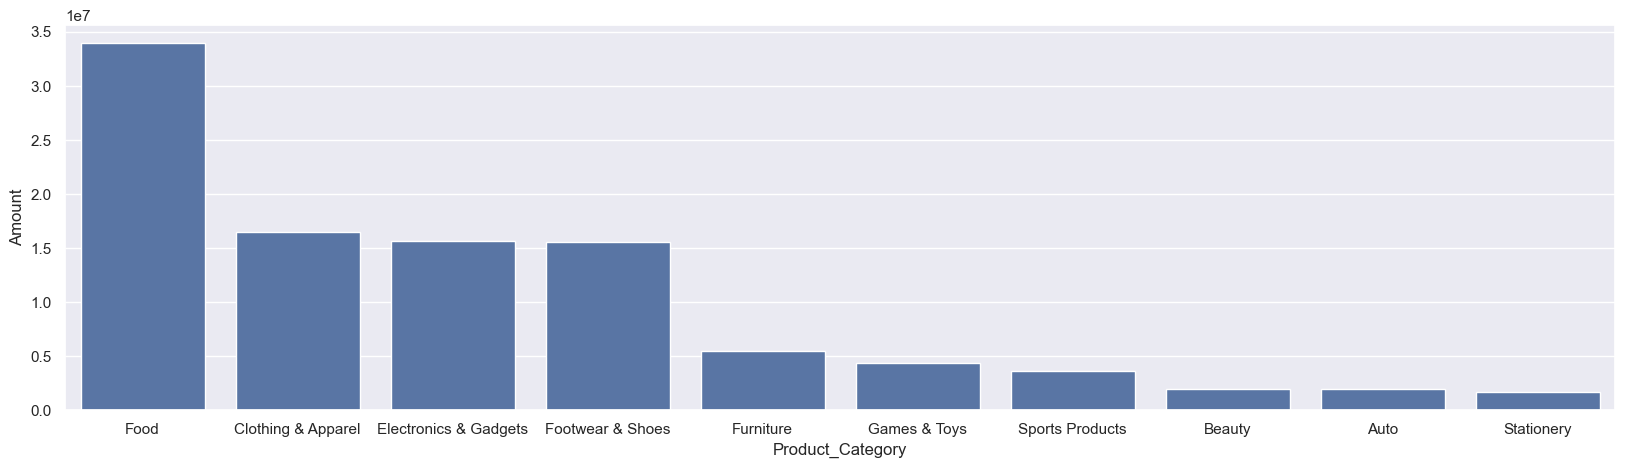

In [60]:
sales_state=df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

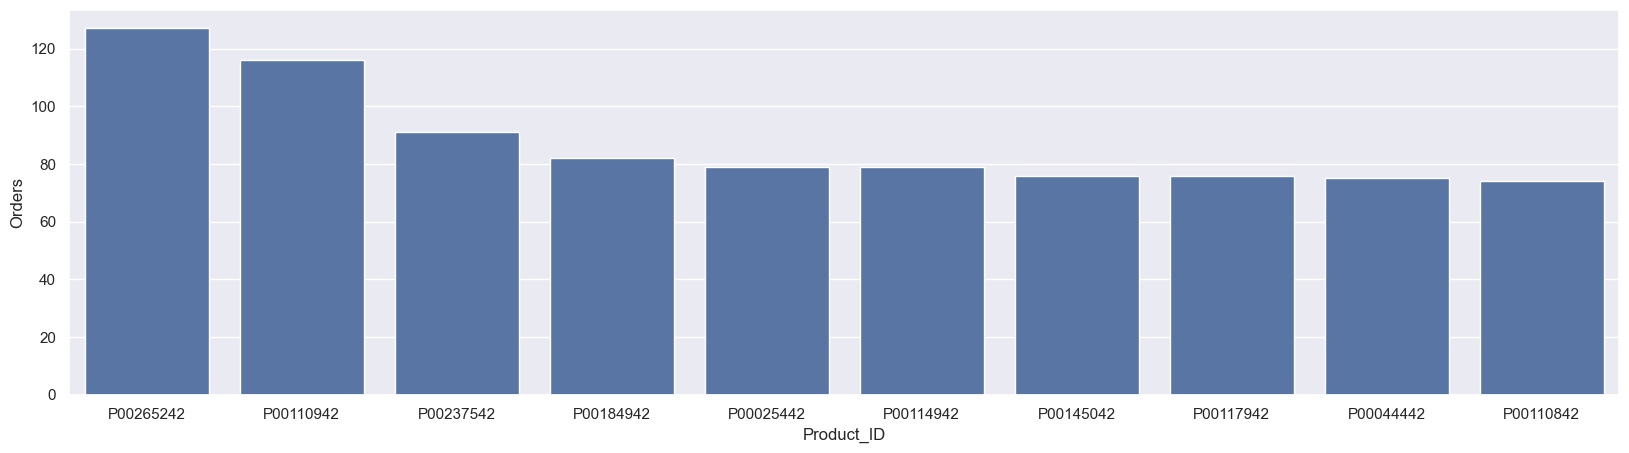

In [64]:
sales_state=df.groupby('Product_ID')['Orders'].sum().reset_index().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

## Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*